In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx
import osmnx as ox
import seaborn as sns
from itertools import product
import pickle as pkl
from randomnetworkmodel import *
from street_network_from_json import *
import pandas as pd
import matplotlib as mpl

In [2]:
G = nx.Graph(ox.graph_from_place('Itzehoe, Germany', network_type='drive', clean_periphery=True, simplify=True).to_undirected())
nx.set_edge_attributes(G, nx.get_edge_attributes(G, 'length'), name='weight')

<AxesSubplot:ylabel='Probability'>

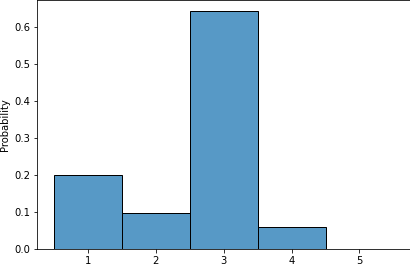

In [3]:
bcs = [d for _, d in G.degree()]
sns.histplot(bcs, bins=np.arange(1, 7)-.5, stat='probability')

In [ ]:
ox.plot_graph(ox.graph_from_place('Itzehoe, Germany', network_type='drive', clean_periphery=True, simplify=True))


In [ ]:
x, y = nx.get_node_attributes(G, 'x'), nx.get_node_attributes(G, 'y')
pos = {node: (x[node], y[node]) for node in G.nodes()}
nx.draw_networkx(G, pos=pos, with_labels=False, node_color='k', alpha=1, width=1,
                 linewidths=0, node_size=.1)

In [ ]:
# G = get_spiralnw(20, 7, 0.5)
set_edge_att(G)
pos = nx.get_node_attributes(G, 'pos')

In [ ]:
cm = plt.get_cmap('cool')

bc = nx.get_edge_attributes(G, 'betweenness centrality').values()
print(bc)
norm = mpl.colors.Normalize(vmin=min(bc), vmax=max(bc))
# pos = nx.get_node_attributes(G, 'pos')
line = nx.draw_networkx(G, pos=pos, with_labels=False, node_color='k', alpha=1, width=2,
                 edge_color=bc, linewidths=0, edge_cmap=cm, node_size=.1)
# plt.colorbar(ScalarMappable(cmap=cm), panchor=False, label='Edge impact')
plt.colorbar(mappable=ScalarMappable(norm=norm, cmap=cm), ax=plt.gca(), label='Betweenness centrality', orientation='horizontal', shrink=.3)
plt.gca().set_aspect('equal')
plt.tight_layout()

dict_values([-0.0052514421533278455, -0.002277707983613819, -0.0025104350055915603, -0.002036361442303569, -0.006259925915230946, -0.005544505810632927, -0.0010106386417361168, 0.0012562949427127323, 0.030071348071275095, 0.01834880177906939, 0.004083497283774329, 0.009005242822634263, 0.02129667739078578, 0.012409952958973736, 0.019624490640279935, 0.022184487882033643, 0.019667588236942368, 0.02174489239607591, 0.0232791668372615, -0.00243285933159898, 0.012116889301668432, 0.01136699111974071, 0.012728875174276233, 0.006014269614255441, 0.013642544223521846, 0.014651027985424947, 0.015056145394052534, 0.012065172185673712, -0.12133050900416498, 0.0188832119776845, 0.036492889973990916, -0.01134544232140855, 0.011884162279691024, -0.018146243074754542, -0.019973581173245547, -0.013931298121159674, -0.014482947358440024, -0.016715402865558726, -0.017723886627461827, -0.018990955969339973, -0.017784223262789167, -0.01662920767223386, -0.014413991203779952, -0.013146921861902028, -0.013

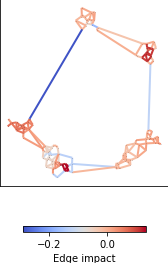

In [14]:
cm = plt.get_cmap('coolwarm')

ei = nx.get_edge_attributes(G, 'betweenness impact').values()
print(ei)
norm = mpl.colors.Normalize(vmin=min(ei), vmax=max(ei))
# pos = nx.get_node_attributes(G, 'pos')
line = nx.draw_networkx(G, pos=pos, with_labels=False, node_color='k', alpha=1, width=2,
                 edge_color=ei, linewidths=0, edge_cmap=cm, node_size=.1)
# plt.colorbar(ScalarMappable(cmap=cm), panchor=False, label='Edge impact')
plt.colorbar(mappable=ScalarMappable(norm=norm, cmap=cm), ax=plt.gca(), label='Edge impact', orientation='horizontal', shrink=.3)
plt.gca().set_aspect('equal')

plt.tight_layout()

(array([ 0.,  3., 28., 60., 39.,  8.,  1.,  1.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

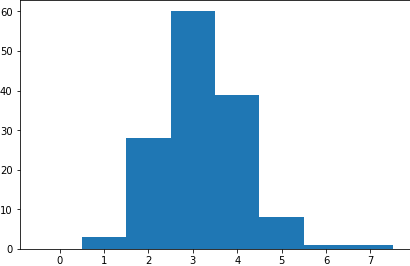

In [15]:
degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=np.arange(0, max(degrees)+2)-.5)

Notes:
- Negative "edge impact" means average centrality is higher without the link; positive value means, average centrality is lower without the link
- caveat: increasing centrality can mean that the graph becomes disconnected

